In [24]:
import pandas as pd
import numpy as np
import datetime as dt
from tqdm import tqdm
import matplotlib.pyplot as plt

In [39]:
# Weather data for Belgium and Germany
Belgium = pd.read_hdf("Temp/BEL_TEMP_GEFS.h5")
DeEc15 = pd.read_hdf("Temp/DEU_TEMP_EC15.h5")
DeGefs = pd.read_hdf("Temp/DEU_TEMP_GEFS.h5")

In [59]:
# Restricting to a sample of 1 week
BelgiumSample = Belgium[(Belgium.ValueDateTime.dt.year == 2022) & (Belgium.ValueDateTime.dt.month == 1) & (Belgium.ValueDateTime.dt.isocalendar().week == 1)]
DeEc15Sample = DeEc15[(DeEc15.ValueDateTime.dt.year == 2022) & (DeEc15.ValueDateTime.dt.month == 1) & (DeEc15.ValueDateTime.dt.isocalendar().week == 1)]
DeGefsSample = DeGefs[(DeGefs.ValueDateTime.dt.year == 2022) & (DeGefs.ValueDateTime.dt.month == 1) & (DeGefs.ValueDateTime.dt.isocalendar().week == 1)]

In [65]:
BelgiumSample['TimeDelta_d'] = ((BelgiumSample['ValueDateTime'] - BelgiumSample['ForecastDateTime']).astype('timedelta64[h]').astype(int))/24
DeEc15Sample['TimeDelta_d'] = ((DeEc15Sample['ValueDateTime'] - DeEc15Sample['ForecastDateTime']).astype('timedelta64[h]').astype(int))/24
DeGefsSample['TimeDelta_d'] = ((DeGefsSample['ValueDateTime'] - DeGefsSample['ForecastDateTime']).astype('timedelta64[h]').astype(int))/24

/var/folders/j2/7j0fctvs2258gcs69mmjmlsr0000gn/T/ipykernel_34512/2696235583.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BelgiumSample['TimeDelta_d'] = ((BelgiumSample['ValueDateTime'] - BelgiumSample['ForecastDateTime']).astype('timedelta64[h]').astype(int))/24
/var/folders/j2/7j0fctvs2258gcs69mmjmlsr0000gn/T/ipykernel_34512/2696235583.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DeEc15Sample['TimeDelta_d'] = ((DeEc15Sample['ValueDateTime'] - DeEc15Sample['ForecastDateTime']).astype('timedelt

In [66]:
interested_in = 10 # Which forecast horizon are you interested in? (in days)

std_devs = []

for date in tqdm(BelgiumSample.ForecastDateTime, position = 0, leave = True):

    df_date = BelgiumSample[BelgiumSample.ForecastDateTime == date]
    df_date_10d = df_date[df_date['TimeDelta_d'] == interested_in]
    df_date_10d_redshift = df_date_10d[df_date_10d['source'] == "Redshift"]
    standard_deviation = df_date_10d_redshift['value'].std()
    std_devs.append(standard_deviation)

100%|██████████| 56420/56420 [00:29<00:00, 1909.35it/s]


In [69]:
BelgiumSample['TimeDelta_d']

1012015    16.00
1038963    15.75
1074330    15.50
1113183    15.25
1053435    15.00
           ...  
140213      1.00
147822      0.75
122455      0.50
31030       0.25
169503      0.00
Name: TimeDelta_d, Length: 56420, dtype: float64

In [68]:
std_devs

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 2.9185465523946372,
 2.659472823498058,
 2.3439191516021434,
 2.145593133022456,
 2.7164176282712487,
 2.99063412558579,
 2.535269492154525,
 2.950556718017222,
 3.2505814202835275,
 3.690455576970328,
 2.461977524944802,
 4.009089135816854,
 3.5397679287274344,
 4.0525207872610345,
 3.7906648209708855,
 3.7582740261872845,
 3.3975576300428467,
 3.8339008462562947,
 3.4936593872297417,
 4.299649898225649,
 2.923891206072182,
 3.622130306461827,
 3.1407724548115907,
 2.587397081221585,
 3.0668641825125698,
 2.1199665243857337,
 1.3923523840214886,
 2.282570706956975,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 2.9185465523946372,
 2.659472823498058,
 2.3439191516021434,
 2.1

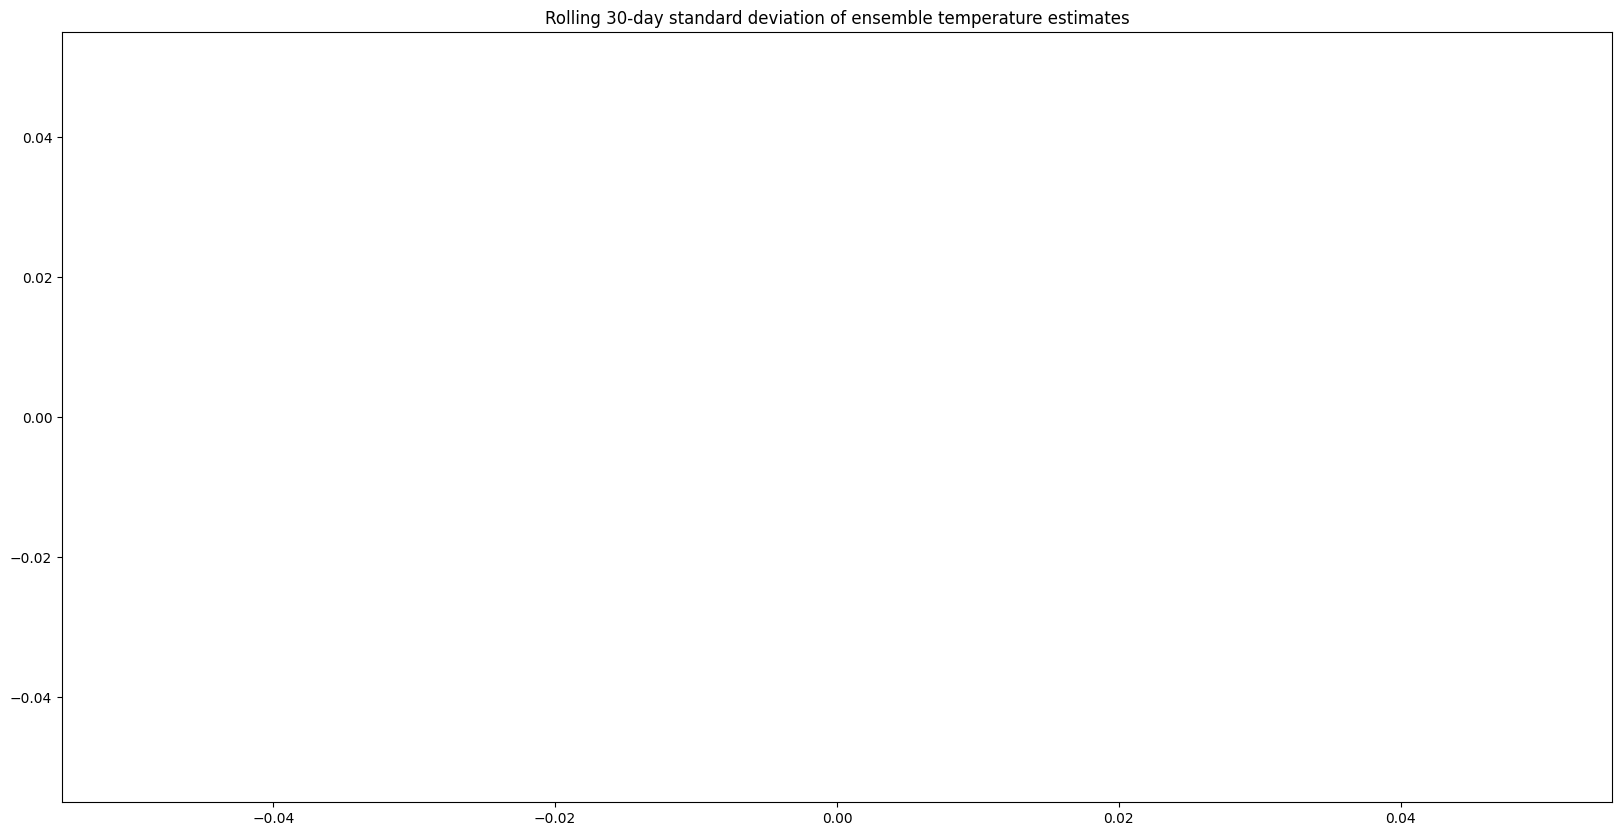

In [67]:
fig, ax = plt.subplots()
ax.plot(pd.Series(std_devs).rolling(120).mean())
ax.set_title("Rolling 30-day standard deviation of ensemble temperature estimates")
fig.set_size_inches(20, 10)

In [34]:
horizons = Belgium2022.TimeDelta_d.unique()

In [35]:
def find_forecast_std_by_horizon(forecast_date, horizons):

    Belgium2022_selected = Belgium2022[Belgium2022.ForecastDateTime == forecast_date ]
    std_over_horizons = []
    
    for horizon in horizons:
        indv_ensembles = Belgium2022_selected[Belgium2022_selected['TimeDelta_d'] == horizon]
        std_over_horizons.append(indv_ensembles['value'].std())
    
    return pd.DataFrame(std_over_horizons, index = horizons)

In [36]:
overall_df = pd.DataFrame(index = horizons)

In [37]:
for day in tqdm(Belgium2022.ForecastDateTime, leave = True, position = 0):

    overall_df = pd.concat([overall_df, find_forecast_std_by_horizon(day, horizons)], axis = 1)

  9%|▊         | 4356/50000 [01:59<20:47, 36.60it/s]


KeyboardInterrupt: 

In [ ]:
overall_df.sort_index(inplace = True)

In [ ]:
mean = overall_df.mean(axis = 1)
upper_bound = overall_df.mean(axis = 1) + overall_df.std(axis = 1)
lower_bound = overall_df.mean(axis = 1) - overall_df.std(axis = 1)

upper_bound_2 = overall_df.mean(axis = 1) + 2*overall_df.std(axis = 1)
lower_bound_2 = overall_df.mean(axis = 1) - 2*overall_df.std(axis = 1)

In [ ]:
fig, ax = plt.subplots()

mean.plot(ax = ax, label = r"Uncertainty: std. dev $(\{\hat{y}_{t+k, m}: m \in M\})$", color = 'blue', linewidth = 3)
upper_bound.plot(ax = ax, linestyle = '--', color = 'gray', label = r"+1$\sigma$")
lower_bound.plot(ax = ax, linestyle = '--', color = 'gray', label = r"-1$\sigma$")

upper_bound_2.plot(ax = ax, linestyle = '--', color = 'lightgray', label = r"+2$\sigma$")
lower_bound_2.plot(ax = ax, linestyle = '--', color = 'lightgray', label = r"-2$\sigma$")

ax.set_ylabel(r"std. dev ($\{\hat{y}_{t+k, m}: m \in M\}$)", fontsize = 16)
ax.set_xlabel(r"Forecast horizon $k$ (in days)", fontsize = 15)

ax.set_title(r"Average standard deviation of ensemble members forecasts across time horizons", fontsize = 15)
ax.legend(fontsize = 15)
ax.grid('on')
fig.set_size_inches(20, 10)

- Visualisation analysing the proportion of the time that the true value falls within the ensemble forecasts (Megi).
- Plot of an actual weather time series with 95 CI around it (Tom).
- Slides describing problem, plan, details on proposal (Patrik).
- Forward to Jeremy and BAM Tuesday morning for approval (Ryan).

### How much of the uncertainty space is covered by the ensemble?

In [ ]:
#How much of the uncertainty space is covered by the ensemble?

def find_forecast_coverage_by_horizon(forecast_date, horizons):
    
    Belgium2022_selected = Belgium2022[Belgium2022.ForecastDateTime == forecast_date ]
    coverage_over_horizons = []
    
    for horizon in horizons:
        indv_ensembles = Belgium2022_selected[Belgium2022_selected['TimeDelta_d'] == horizon]
        coverage_over_horizons.append(indv_ensembles['value'].std()/indv_ensembles['value'].mean())
    
    return pd.DataFrame(coverage_over_horizons, index = horizons)